# How we get final data
---
* [Title](#first-bullet)
* 1. [Language test score](#Language-test-score)
* 2. [DropOut Rate](#DropOut-Rate)
    * 2.1. [Baseline Data](#Baseline-Data-Group-F)
    * 2.2. [Endline DO Rate](#Endline-DO-Rate)
* 3. [Intermediate Variable](#Intermediate-Variable)
    * 3.1. [Imputing NaN Values](#Imputing-NaN-Values)
    * 3.2. [Detecting Outlier](#Detecting-Outlier-or-typo)
* 4. [Calculating Index Process](#Make-Index)
    * 4.1. [Parent level Input](#Parent-level-Input)
    * 4.2. [School based management](#School-based-management)
* 5. [Final Dataset](#Combine-All)

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
pd.options.mode.chained_assignment = None

%matplotlib inline

In [2]:
def fileaddres(path, spes):
    files = []
    #r = root, d=directory, f=files
    for r,d,f in os.walk(path):
        for file in f:
            if re.search(spes, file):
                files.append(os.path.join(r, file))
    return files

In [3]:
# Our working directory
path = "C:/Users/LENOVO/Downloads/Tugas akhir APP/Data"

satu = fileaddres(path, ".csv")

In [4]:
satu

['C:/Users/LENOVO/Downloads/Tugas akhir APP/Data\\end_test.dta.csv',
 'C:/Users/LENOVO/Downloads/Tugas akhir APP/Data\\gender_assignment.csv',
 'C:/Users/LENOVO/Downloads/Tugas akhir APP/Data\\SCNewMember.csv',
 'C:/Users/LENOVO/Downloads/Tugas akhir APP/Data\\score_baselin.csv',
 'C:/Users/LENOVO/Downloads/Tugas akhir APP/Data\\score_baselin_rev2.csv',
 'C:/Users/LENOVO/Downloads/Tugas akhir APP/Data\\status_assignment.csv']

In [5]:
v = pd.read_csv(satu[3])
v["no_urut_sekolah"] = v["idgen"].astype("str").str[1:-1].astype("int64")
v.set_index("no_urut_sekolah", inplace=True)

In [6]:
a = pd.read_csv(satu[4]).groupby("no_urut_sekolah").sum()
a.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            511, 512, 513, 514, 515, 516, 517, 518, 519, 520],
           dtype='int64', name='no_urut_sekolah', length=520)

## Language test score

In [7]:
z = pd.concat([v,a], axis=1)
z["bhs_score_"] = (z["nilai_bi_base"] /z["num_student"]) /30*100
z["math_score_"] = (z["nilai_m_base"]/z["num_student"])/30*100
z.head()

,idgen,nilai_bi,nilai_m,num_student,bhs_score,math_score,Unnamed: 0,kode,kode_bps,no_absen,nilai_bi_base,nilai_m_base,bhs_score_,math_score_
no_urut_sekolah,,,,,,,,,,,,,,
1,50011,245,276,32,25.520834,28.750000,435,150,870,490.0,205.0,225.0,21.354167,23.437500
2,50021,577,804,43,44.728683,62.325581,2193,215,1247,946.0,577.0,804.0,44.728682,62.325581
3,50031,190,260,18,35.185184,48.148148,1027,65,377,115.0,113.0,168.0,20.925926,31.111111
4,50041,530,651,32,55.208332,67.812500,3726,180,1044,666.0,530.0,651.0,55.208333,67.812500
5,50051,117,157,14,27.857143,37.380951,1664,65,377,103.0,106.0,142.0,25.238095,33.809524


**There are different row values (i.e. index 1) of nilai_bi & nilai_m. But, we'll choose the data from score_baselin_rev2**

In [8]:
base_score = z[["num_student", "nilai_bi_base", "nilai_m_base","bhs_score_","math_score_"]]
base_score["data"] = "baseline"
base_score.index = base_score.index.astype("str")
base_score = base_score.rename(columns={"nilai_bi_base":"nilai_bhs_indonesia", "nilai_m_base":"nilai_matematika"})
base_score.sample()

,num_student,nilai_bhs_indonesia,nilai_matematika,bhs_score_,math_score_,data
no_urut_sekolah,,,,,,
468,10,97.0,137.0,32.333333,45.666667,baseline


In [9]:
base_score.index

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '511', '512', '513', '514', '515', '516', '517', '518', '519', '520'],
      dtype='object', name='no_urut_sekolah', length=520)

In [10]:
en = pd.read_csv(satu[0])
en["num_student"] = 1
en_ = en.groupby("no_urut_sekolah").sum()[["nilai_matematika", "nilai_bhs_indonesia", "num_student", ]]
en_["bhs_score_"] = (en_["nilai_bhs_indonesia"] /en_["num_student"]) /30*100
en_["math_score_"] = (en_["nilai_matematika"]/en_["num_student"])/30*100
en_["data"] = "endline"
en_.index = en_.index.astype("str")

In [11]:
score = pd.concat([base_score, en_])
score.index = score.index.astype("int")
score.sample(8)

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,bhs_score_,data,math_score_,nilai_bhs_indonesia,nilai_matematika,num_student
no_urut_sekolah,,,,,,
458,50.980392,endline,32.156863,260.0,164.0,17
197,47.023810,endline,25.595238,395.0,215.0,28
507,40.512821,baseline,55.897436,158.0,218.0,13
372,38.888889,baseline,54.126984,245.0,341.0,21
155,29.420290,baseline,46.521739,203.0,321.0,23
196,37.017544,endline,27.719298,211.0,158.0,19
44,38.245614,endline,25.789474,436.0,294.0,38
298,33.333333,baseline,50.158730,210.0,316.0,21


## DropOut Rate
---
***DO rate in F (secondary questionare) in E Student section (E1, E2)***

### Baseline Data Group F

In [12]:
do_b = fileaddres(path+ "/Baseline", r"^[fF].+.dta")[0]
do_e = fileaddres(path+ "/Endline", r"^[fF].+.dta")[5:7]
do_base = pd.read_stata(do_b)
idb = do_base[["ID3", "C1"]]
#filter only contains the E1 and E2 Section
do_base = do_base[do_base.columns[do_base.columns.str.contains(r"^[Ee][12].+")]]
do_base = pd.concat([idb, do_base], axis=1, sort=False)
do_base.sample(5)

,ID3,C1,E1_10,E1_11,E1_12,E1_13,E1_14,E1_15,E1_16,E1_17,...,E2a_9,E2a_10,E2a_11,E2a_12,E2b_7,E2b_8,E2b_9,E2b_10,E2b_11,E2b_12
123,124.0,1.010329e+11,9.0,3.0,1.0,7.0,5.0,1.0,8.0,12.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
301,302.0,1.010323e+11,21.0,14.0,1.0,16.0,12.0,1.0,12.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,80.0,1.010329e+11,20.0,26.0,1.0,19.0,13.0,1.0,18.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,215.0,1.010314e+11,14.0,13.0,1.0,15.0,8.0,1.0,10.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
430,431.0,1.011129e+11,13.0,16.0,1.0,11.0,9.0,1.0,8.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# getting variable labels in stata
var_lab = pd.read_stata(do_b, iterator=True).variable_labels()
o = [i + ":"  + (var_lab[i]) for i in var_lab.keys() if re.search(r"^[eE][12].+", i)]
o

['E1_10:Jumlah siswa Kelas 4 Tahun Ajaran 2006/2007',
 'E1_11:Jumlah siswi Kelas 4 Tahun Ajaran 2006/2007',
 'E1_12:Jumlah Rombongan Belajar Kelas 4 Tahun Ajaran 2006/2007',
 'E1_13:Jumlah siswa Kelas 5 Tahun Ajaran 2006/2007',
 'E1_14:Jumlah siswi Kelas 5 Tahun Ajaran 2006/2007',
 'E1_15:Jumlah Rombongan Belajar Kelas 5 Tahun Ajaran 2006/2007',
 'E1_16:Jumlah siswa Kelas 6 Tahun Ajaran 2006/2007',
 'E1_17:Jumlah siswi Kelas 6 Tahun Ajaran 2006/2007',
 'E1_18:Jumlah Rombongan Belajar Kelas 6 Tahun Ajaran 2006/2007',
 'E2a_7:Jumlah siswa kelas 4 yang mengulang pada TA 2006/2007',
 'E2a_8:Jumlah siswi kelas 4 yang mengulang pada TA 2006/2007',
 'E2a_9:Jumlah siswa kelas 5 yang mengulang pada TA 2006/2007',
 'E2a_10:Jumlah siswi kelas 5 yang mengulang pada TA 2006/2007',
 'E2a_11:Jumlah siswa kelas 6 yang mengulang pada TA 2006/2007',
 'E2a_12:Jumlah siswi kelas 6 yang mengulang pada TA 2006/2007',
 'E2b_7:Jumlah siswa kelas 4 yang putus sekolah pada TA 2006/2007',
 'E2b_8:Jumlah siswi ke

In [14]:
do_base["grade4_student"] = do_base["E1_10"] + do_base["E1_11"]
do_base["grade4_do"] = do_base["E2b_7"] + do_base["E2b_8"]
do_base["grade456_student"] = do_base[["E1_10", "E1_11", "E1_13", "E1_14", "E1_16", "E1_17"]].sum(axis=1)
do_base["grade456_do"] = do_base[["E2b_7", "E2b_8", "E2b_9", "E2b_10", "E2b_11", "E2b_12"]].sum(axis=1)
do_baseline = do_base[["ID3", "C1", "grade4_student", "grade4_do", "grade456_student", "grade456_do"]]
do_baseline["data"] = "baseline"
do_baseline["ID3"] = do_baseline["ID3"].astype("int")

In [15]:
do_baseline.sample(5)

,ID3,C1,grade4_student,grade4_do,grade456_student,grade456_do,data
449,450,1.010312e+11,16.0,NaN,48.0,0.0,baseline
395,396,1.010312e+11,19.0,NaN,58.0,0.0,baseline
515,516,1.010403e+11,31.0,NaN,71.0,1.0,baseline
470,471,1.010312e+11,26.0,NaN,92.0,0.0,baseline
13,14,1.010329e+11,25.0,NaN,86.0,0.0,baseline


### Endline DO Rate

In [16]:
k = pd.read_stata(do_e[0], index_col="issa_id")
l = pd.read_stata(do_e[1], index_col="issa_id")
l = l[l["fe2no"] == "B"]
do_endline = pd.concat([k,l], axis=1 , sort=False)
do_endline["ID3"] = do_endline.index.str[2:5].astype("int")
do_endline.sample(5)

,issa_del,issa_sec,fe110,fe111,fe112,fe113,fe114,fe115,fe116,fe117,...,issa_del,issa_sec,fe2no,fe27,fe28,fe29,fe210,fe211,fe212,ID3
issa_id,,,,,,,,,,,,,,,,,,,,,
F511513,,FE1,11,20,1,15,12,1,12,16,...,,FE2,B,0,0,0,0,0,0,115
F648513,,FE1,21,19,2,19,26,2,25,21,...,,FE2,B,0,0,1,0,0,0,485
F417313,,FE1,9,7,0,10,5,0,9,6,...,,FE2,B,1,0,0,0,0,0,173
F419213,,FE1,22,15,1,16,16,1,15,22,...,,FE2,B,0,0,0,0,0,0,192
F507113,,FE1,8,7,1,9,9,1,8,6,...,,FE2,B,0,0,0,0,0,0,71


In [17]:
do_endline["grade4_student"] = do_endline["fe110"] + do_endline["fe111"]
do_endline["grade4_do"] = do_endline["fe27"] + do_endline["fe28"]
do_endline["grade456_student"] = do_endline[["fe110", "fe111", "fe113", "fe114", "fe116", "fe117"]].sum(axis=1)
do_endline["grade456_do"] = do_endline[["fe27", "fe28", "fe29", "fe210", "fe211", "fe212"]].sum(axis=1)
do_endline = do_endline[["ID3", "grade4_student", "grade4_do", "grade456_student", "grade456_do"]]
do_endline["data"] = "endline"
do_endline.sample(4)

,ID3,grade4_student,grade4_do,grade456_student,grade456_do,data
issa_id,,,,,,
F334313,343,26,0,74,0,endline
F414513,145,28,0,176,0,endline
F650413,504,7,0,26,0,endline
F143013,430,14,0,41,0,endline


In [18]:
do_endline.set_index("ID3", inplace=True)
do_baseline.set_index("ID3", inplace=True)
do_endline["C1"] = do_baseline["C1"]

In [19]:
data_do = pd.concat([do_baseline, do_endline], sort=False)
data_do.fillna(0, inplace=True)
data_do["dropoutrate_4"] = data_do["grade4_do"] / data_do["grade4_student"]
data_do["dropoutrate"] = data_do["grade456_do"] / data_do["grade456_student"]
data_do.fillna(0, inplace=True)
data_do.sample(4)

,C1,grade4_student,grade4_do,grade456_student,grade456_do,data,dropoutrate_4,dropoutrate
ID3,,,,,,,,
391,1.010312e+11,15.0,0.0,45.0,0.0,baseline,0.0,0.0
497,1.010403e+11,17.0,0.0,45.0,0.0,baseline,0.0,0.0
213,1.010314e+11,16.0,0.0,62.0,0.0,baseline,0.0,0.0
184,1.010327e+11,28.0,0.0,96.0,0.0,endline,0.0,0.0


In [20]:
data_do["dropoutrate_4"].unique()

array([ 0.        ,  0.03333333,  0.0862069 ,  0.05      ,  0.08      ,
        0.04444444,  0.54545455,  0.0625    ,  0.06060606,  0.17241379,
        0.09677419,  0.26086957,  0.11111111,  0.125     , -3.2       ,
       -2.90909091,  0.08333333,  0.15384615, -4.26666667,  0.04545455,
        0.05263158,  0.07692308,  0.11764706,  0.02040816,  0.08695652,
        0.02857143,  0.04166667,  0.22222222,  0.03174603,  0.07142857,
        0.02941176,  0.03703704,  0.07407407,  0.04651163,  0.04347826,
        0.03278689,  0.01282051,  0.03125   ,  0.02      ])

**There are negative values of droprate in grade 4. I think maybe entry error either in column grade4_student or grade4_do**

In [21]:
data_do["grade4_do"].unique()

array([  0.,   2.,   5.,   3.,   4.,  12.,   6., -64.,   1.])

The number is not only negative but also realtively large. Let's imputing them by the null values

In [22]:
data_do[data_do["grade4_do"] == -64] = 0

In [23]:
# Redefine the dropoutrate
data_do["dropoutrate_4"] = data_do["grade4_do"] / data_do["grade4_student"]
data_do["dropoutrate"] = data_do["grade456_do"] / data_do["grade456_student"]
data_do.fillna(0, inplace=True)
data_do.sample(4)

,C1,grade4_student,grade4_do,grade456_student,grade456_do,data,dropoutrate_4,dropoutrate
ID3,,,,,,,,
242,1.010417e+11,25.0,0.0,83.0,0.0,endline,0.0,0.000000
40,1.010329e+11,38.0,0.0,114.0,1.0,endline,0.0,0.008772
350,1.010323e+11,33.0,0.0,103.0,0.0,baseline,0.0,0.000000
95,1.010329e+11,16.0,0.0,50.0,1.0,baseline,0.0,0.020000


In [24]:
data_do["no_urut_sekolah"] = data_do.index.astype("int")
data_do.set_index("no_urut_sekolah", inplace=True)

## Intermediate Variable

In [25]:
column_interest = ["Scparfundraise", "Scparinkind", "Scsizeinkind", "Pcont", "Pcont_physical","Scrapbs", "Screcrapbs", "Scdistrapbs", "Spinviterapbs", "Spparentsrapbs", "Pmtgrapbs", "Prapbs"]
baseline = pd.read_csv("dataapp_intermvar_panelA(baseline).csv", index_col="index")[column_interest]
baseline["data"] = "baseline"
endline = pd.read_csv("dataapp_intermvar_panelA(endline).csv", index_col="index")[column_interest]
endline["data"] = "endline"
endline.index = endline.index.astype("int")
endline.sample(5)

,Scparfundraise,Scparinkind,Scsizeinkind,Pcont,Pcont_physical,Scrapbs,Screcrapbs,Scdistrapbs,Spinviterapbs,Spparentsrapbs,Pmtgrapbs,Prapbs,data
index,,,,,,,,,,,,,
416,50000,0,NaN,0.0,0,0,1,1,1,1,1.000000,2.142857,endline
60,0,0,NaN,0.0,0,0,0,0,0,0,0.333333,1.571429,endline
324,9999999998,0,NaN,25000.0,0,0,0,0,1,1,0.333333,3.000000,endline
104,0,0,NaN,0.0,0,0,0,0,1,0,0.333333,3.250000,endline
445,13104000,0,NaN,0.0,0,1,0,1,0,1,1.000000,1.666667,endline


### Imputing NaN Values

In [26]:
baseline["Spparentsrapbs"] = baseline["Spparentsrapbs"].apply(lambda x: 1 if x in ["ya", "Ya"] else 0)
baseline[["Pcont", "Scrapbs"]] = baseline[["Pcont", "Scrapbs"]].fillna(0)
baseline["Scsizeinkind"] = baseline["Scsizeinkind"].fillna(2)

In [27]:
endline["Scsizeinkind"] = endline["Scsizeinkind"].fillna(2)

### Detecting Outlier or typo

In [28]:
z = np.abs(stats.zscore(baseline.iloc[:,:-1]))
print(np.where(z > 5))

(array([  4,  37,  39,  49,  62,  70,  86, 130, 168, 212, 232, 238, 253,
       253, 260, 262, 305, 337, 345, 399, 444, 495, 502], dtype=int64), array([4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 0, 4,
       4], dtype=int64))


In [29]:
print (baseline.iloc[37,0])
print (baseline.iloc[49,0])
print (baseline.iloc[444,0])

12000000
38000000
19100000


**I dont think its the error input**

In [30]:
w = np.abs(stats.zscore(endline.iloc[:,:-1]))
print(np.where(w > 6))

(array([  1,   6,  10,  17,  73, 114, 120, 121, 229, 253, 254, 395, 422],
      dtype=int64), array([4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0], dtype=int64))


C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [31]:
print (endline.iloc[422,0])
endline.iloc[422,0] = endline.iloc[:,0].mean()

19999999996


## Make Index

### We cant do direct aritmatic mean to create parent level input index becaues the composite index consist of continus, binary, and order variable type. But, the concept is same. We distribute the equal weight for those five variable. The Index will be in range 0 - 1
---
**<span style="color:blue"> *Variable weight =  (1 per number of variable / max (variable values))
example binary, Scsizeinkind weight =  0.05 because the max values of Scsizeinkind is 4 based on questionare.* text</span>**

## Parent level Input
---
The index can be from Panel A (Parents financial and in-kind support for school committees) or Panel B (Parents' support for and involvement in education). **Our's index based on Panel A which have been gathering in the last notebook.** The Panel A contains (Intermediate variable) SCparfundraise, SCparinkind, SCsizeinkind Pcont, and Pcont_physical. 

In [32]:
# We separated them in order to cut the depency values of index each endline and baseline
baseline["parent_input"] = ((baseline["Scparfundraise"] * 0.2) / max(baseline["Scparfundraise"])) + baseline["Scparinkind"] * 0.2 + baseline["Scsizeinkind"] * 0.05 + ((baseline["Pcont"] * 0.2) / max(baseline["Pcont"])) + baseline["Pcont_physical"] * 0.2
endline["parent_input"] = ((endline["Scparfundraise"] * 0.2) / max(endline["Scparfundraise"])) + endline["Scparinkind"] * 0.2 + endline["Scsizeinkind"] * 0.05 + ((endline["Pcont"] * 0.2) / max(endline["Pcont"])) + endline["Pcont_physical"] * 0.2
baseline.sample(5)

,Scparfundraise,Scparinkind,Scsizeinkind,Pcont,Pcont_physical,Scrapbs,Screcrapbs,Scdistrapbs,Spinviterapbs,Spparentsrapbs,Pmtgrapbs,Prapbs,data,parent_input
index,,,,,,,,,,,,,,
271,0,0,2.0,0.0,0,0.0,0,0,1,1,1.000000,3.000000,baseline,0.100000
39,0,0,2.0,0.0,0,1.0,1,1,0,0,0.000000,2.333333,baseline,0.100000
245,0,0,2.0,0.0,0,0.0,0,1,0,1,0.333333,1.000000,baseline,0.100000
349,0,1,2.0,0.0,0,0.0,1,1,1,1,0.000000,4.000000,baseline,0.300000
460,72000,1,3.0,0.0,0,0.0,0,1,1,0,0.333333,2.000000,baseline,0.350379


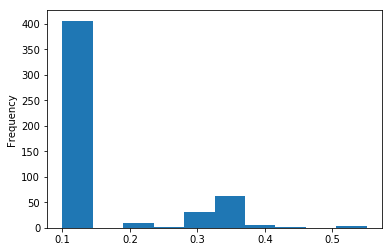

In [33]:
endline["parent_input"].plot(kind="hist")

## School based management
---
The index can be from Panel A (Financial accountability of school management to parents and school committees) or Panel B (Principals’ performance and management of teachers). **Our's index based on Panel A which have been gathering in the last notebook.** The Panel A contains (Intermediate variable) SCrapbs, SCrecrapbs, SCdistrapbs, SPinviterapbs, SPparentsrapbs, Pmtgrapbs, Prapbs.

In [34]:
#Similar process
baseline["School_management"] = (baseline["Scrapbs"] / 7 ) + (baseline["Screcrapbs"] /7) + (baseline["Scdistrapbs"] /7) + (baseline["Spinviterapbs"] /7) + (baseline["Spparentsrapbs"] /7) + (baseline["Pmtgrapbs"] /7) + ((baseline["Prapbs"] / 7) /4)
endline["School_management"] = (endline["Scrapbs"] /7) + (endline["Screcrapbs"] /7) + (endline["Scdistrapbs"] /7) + (endline["Spinviterapbs"] /7) + (endline["Spparentsrapbs"] /7) + (endline["Pmtgrapbs"] /7) + ((endline["Prapbs"] / 7) /4)
endline.sample(5)

,Scparfundraise,Scparinkind,Scsizeinkind,Pcont,Pcont_physical,Scrapbs,Screcrapbs,Scdistrapbs,Spinviterapbs,Spparentsrapbs,Pmtgrapbs,Prapbs,data,parent_input,School_management
index,,,,,,,,,,,,,,,
180,3000000.0,0,2.0,0.0,0,0,0,0,0,0,0.000000,0.666667,endline,0.100030,0.023810
430,490000.0,0,2.0,0.0,0,0,1,1,1,1,0.000000,1.000000,endline,0.100005,0.607143
364,0.0,0,2.0,0.0,0,0,0,1,1,0,1.000000,3.000000,endline,0.100000,0.535714
328,0.0,0,2.0,50000.0,0,0,1,0,1,1,0.666667,3.333333,endline,0.101000,0.642857
79,0.0,0,2.0,0.0,0,0,0,1,1,0,0.000000,1.333333,endline,0.100000,0.333333


In [35]:
# Combine
x = pd.concat([baseline, endline])
for i in x:
    if i not in ["data"]:
        x[i].fillna(x[i].mean())

## Combine All

In [36]:
data_do["index"] = data_do.index.astype("str") + "_" + data_do["data"].astype("str")
data_do.set_index("index", inplace=True)
score["index"] = score.index.astype("str") + "_" + score["data"]
score.set_index("index", inplace=True)
x["index"] = x.index.astype("str") + "_" + x["data"]
x.set_index("index", inplace=True)

In [37]:
for i in [score, data_do]:
    x = pd.merge(x, i, left_index=True, right_index=True)

In [39]:
x.to_csv("y_dataset.csv")